In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import col, countDistinct, sumDistinct
import pandas

import seaborn as sns
import matplotlib.pyplot as plt
import os, re
import itertools

from pyspark.sql import SQLContext


from pyspark.sql.functions import lit, regexp_extract
#https://seaborn.pydata.org/tutorial/distributions.html

In [2]:
spark = SparkSession.builder.appName("Test").getOrCreate()
spark

In [3]:
dir=os.listdir('/Users/felix.baertschi/Documents/Dev/school/excel/')

In [4]:
#Load Excel
pdf000 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2020-12-10_1608_TestName_0000_0000.xlsx', sheet_name='Analog Current Input')
pdf001 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2020-12-22_2304_TestName_0000_0001.xlsx', sheet_name='Analog Current Input')
pdf002 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-01-04_0535_TestName_0000_0002.xlsx', sheet_name='Analog Current Input')
pdf003 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-01-16_1152_TestName_0000_0003.xlsx', sheet_name='Analog Current Input')
pdf004 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-01-28_1812_TestName_0000_0004.xlsx', sheet_name='Analog Current Input')
pdf005 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-02-10_0038_TestName_0000_0005.xlsx', sheet_name='Analog Current Input')
pdf006 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-02-22_0701_TestName_0000_0006.xlsx', sheet_name='Analog Current Input')
pdf007 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-03-06_1326_TestName_0000_0007.xlsx', sheet_name='Analog Current Input')
pdf008 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-03-18_1952_TestName_0000_0008.xlsx', sheet_name='Analog Current Input')
pdf009 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-03-31_0317_TestName_0000_0009.xlsx', sheet_name='Analog Current Input')
pdf010 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-04-12_0934_TestName_0000_0010.xlsx', sheet_name='Analog Current Input')
pdf011 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-04-24_1549_TestName_0000_0011.xlsx', sheet_name='Analog Current Input')
pdf012 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-05-06_2209_TestName_0000_0012.xlsx', sheet_name='Analog Current Input')
pdf013 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-05-19_0423_TestName_0000_0013.xlsx', sheet_name='Analog Current Input')

In [5]:
#convert pandas df to spark df
df000 = spark.createDataFrame(pdf000)
df001 = spark.createDataFrame(pdf001)
df002 = spark.createDataFrame(pdf002)
df003 = spark.createDataFrame(pdf003)
df004 = spark.createDataFrame(pdf004)
df005 = spark.createDataFrame(pdf005)
df006 = spark.createDataFrame(pdf006)
df007 = spark.createDataFrame(pdf007)
df008 = spark.createDataFrame(pdf008)
df009 = spark.createDataFrame(pdf009)
df010 = spark.createDataFrame(pdf010)
df011 = spark.createDataFrame(pdf011)
df012 = spark.createDataFrame(pdf012)
df013 = spark.createDataFrame(pdf013)

In [6]:
#merge df's
unionDF000 = df000.union(df001)
unionDF001 = unionDF000.union(df002)
unionDF002 = unionDF001.union(df003)
unionDF003 = unionDF002.union(df004)
unionDF004 = unionDF003.union(df005)
unionDF005 = unionDF004.union(df006)
unionDF006 = unionDF005.union(df007)
unionDF007 = unionDF006.union(df008)
unionDF008 = unionDF007.union(df009)
unionDF009 = unionDF008.union(df010)
unionDF010 = unionDF009.union(df011)
unionDF011 = unionDF010.union(df012)
unionDF = unionDF011.union(df013)

In [7]:
#show schema
unionDF.printSchema()
unionDF.show(truncate=False)

root
 |-- SUT_ID: string (nullable = true)
 |-- Module Type: string (nullable = true)
 |-- Channel: string (nullable = true)
 |-- Write Value: long (nullable = true)
 |-- Read Value: double (nullable = true)
 |-- Higher Limit: double (nullable = true)
 |-- Lower Limit: double (nullable = true)
 |-- Delta: double (nullable = true)
 |-- Result: long (nullable = true)
 |-- Date Time: timestamp (nullable = true)
 |-- Ambient Tempr: double (nullable = true)
 |-- TestBox Tempr: double (nullable = true)
 |-- 24V Fix: double (nullable = true)
 |-- 36V Fix: double (nullable = true)
 |-- Logic Supply: double (nullable = true)
 |-- Load Supply: double (nullable = true)

+------+---------------+----------+-----------+----------+------------+-----------+------+------+-----------------------+------------------+------------------+------------------+------------------+-----------------+------------------+
|SUT_ID|Module Type    |Channel   |Write Value|Read Value|Higher Limit|Lower Limit|Delta |Result|

In [8]:
#count all the different modules
unionDF.select("Module Type").distinct().show(truncate=False)

+---------------+
|Module Type    |
+---------------+
|AIT304-T/12B   |
|SAIT304-T/12B/I|
|SAIT302-T/12B/I|
+---------------+



In [9]:
unionDF[['Delta']].describe().show()

+-------+--------------------+
|summary|               Delta|
+-------+--------------------+
|  count|             4066360|
|   mean|-0.02777285139535...|
| stddev|0.017858528306536902|
|    min|                -0.1|
|    max|               0.044|
+-------+--------------------+



In [10]:
unionDF.approxQuantile("Delta", [0.95,0.75,0.5,0.25,0.05], 0.25)

[0.044, 0.044, -0.031, -0.1, -0.1]

In [11]:
#create sample DF
sdfsample = unionDF.select(['Write Value', 'Read Value', 'Delta', 'Module Type', 'Channel']).sample(False,fraction=0.1, seed=3)#Only AIT
pdfsample = sdfsample.toPandas()

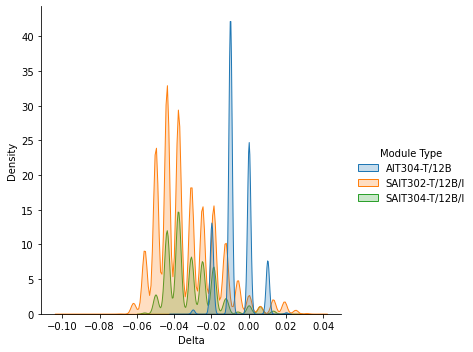

In [12]:
#All
sns.displot(pdfsample, x="Delta", hue="Module Type", kind="kde",fill=True)

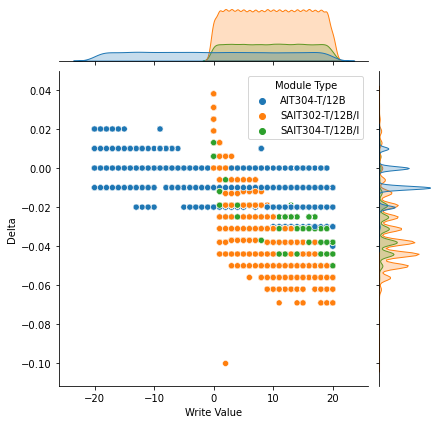

In [13]:
sns.jointplot(data=pdfsample, x="Write Value", y="Delta", hue="Module Type")

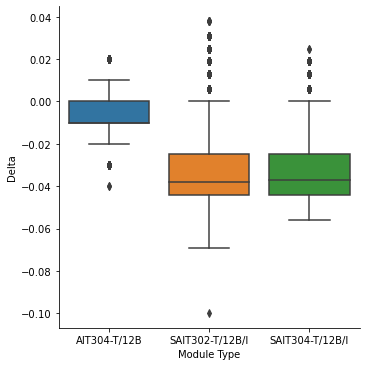

In [14]:
sns.catplot(x="Module Type", y="Delta", kind="box", data=pdfsample)

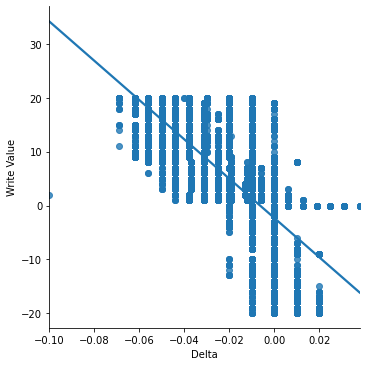

In [15]:
sns.lmplot(y = 'Write Value', x = 'Delta', data=pdfsample)

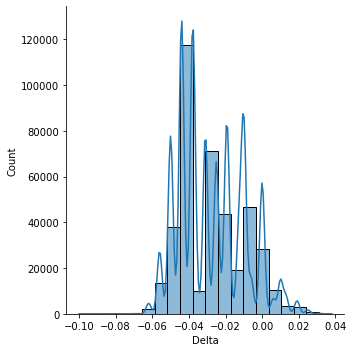

In [16]:
sns.displot(pdfsample, x="Delta", bins=20, kde=True)

In [35]:
#Extract Modules out from Channel from all types
pattern = """^%IW[0-9].[0-9].([0-9]).[0-9]"""
unionDF_Module=unionDF.select(
    col("Module Type"),
    col("Channel"),
    regexp_extract(col("Channel"), pattern, 1).alias("Module"),
    col("Delta"),
    col("Write Value"),
    )

In [36]:
#filter by Module Type and create new DF
sdfAIT304 = unionDF_Module.filter(col("Module Type").contains("AIT304"))
sdfSAIT302 = unionDF_Module.filter(col("Module Type").contains("SAIT302"))
sdfSAIT304 = unionDF_Module.filter(col("Module Type").contains("SAIT304"))

In [38]:
#Sample DF
sdfsampleAIT304 = sdfAIT304.select(['Write Value', 'Delta', 'Module Type', 'Channel','Module']).sample(False,fraction=0.1, seed=3)
sdfsampleSAIT302 = sdfSAIT302.select(['Write Value', 'Delta', 'Module Type', 'Channel','Module']).sample(False,fraction=0.1, seed=3)
sdfsampleSAIT304 = sdfSAIT304.select(['Write Value', 'Delta', 'Module Type', 'Channel','Module']).sample(False,fraction=0.1, seed=3)


In [39]:
#Create pandas DF from Spark DF
pdfsampleAIT304 = sdfsampleAIT304.toPandas()
pdfsampleSAIT302 = sdfsampleSAIT302.toPandas()
pdfsampleSAIT304 = sdfsampleSAIT304.toPandas()

In [32]:
#Quantile AIT 304
sdfsampleAIT304.approxQuantile("Delta", [0.95,0.75,0.5,0.25,0.05], 0.25)

[0.031, 0.031, -0.031, -0.062, -0.062]

In [33]:
#Quantile SAIT 302
sdfsampleSAIT302.approxQuantile("Delta", [0.95,0.75,0.5,0.25,0.05], 0.25)

[0.044, 0.044, -0.044, -0.069, -0.069]

In [34]:
#Quantile SAIT 304
sdfsampleSAIT304.approxQuantile("Delta", [0.95,0.75,0.5,0.25,0.05], 0.25)

[0.025, 0.025, -0.038, -0.062, -0.062]

In [44]:
pdfsampleAIT304.head()

,Write Value,Delta,Module Type,Channel,Module
0,0,0.006,SAIT304-T/12B/I,%IW2.1.2.1,2
1,-5,0.000,AIT304-T/12B,%IW3.1.1.0,1
2,18,-0.044,SAIT304-T/12B/I,%IW2.1.2.0,2
3,0,0.006,SAIT304-T/12B/I,%IW2.1.2.1,2
4,17,-0.044,SAIT304-T/12B/I,%IW2.1.2.0,2


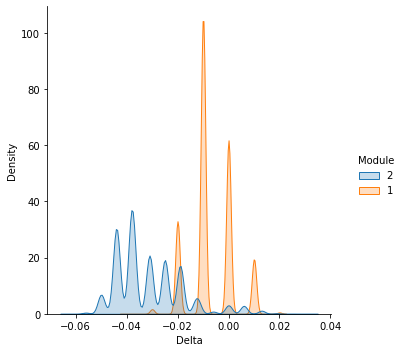

In [41]:
# AIT304
sns.displot(pdfsampleAIT304, x="Delta", hue="Module", kind="kde",fill=True)

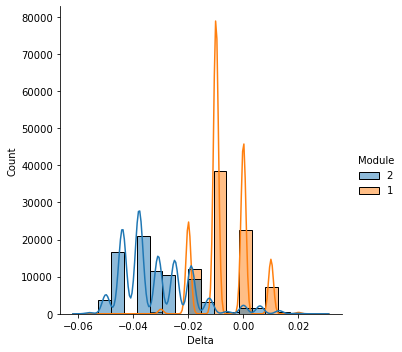

In [52]:
# AIT304
sns.displot(pdfsampleAIT304, x="Delta", bins=20,hue="Module", kde=True)

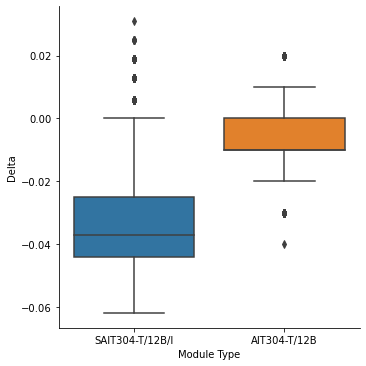

In [45]:
# AIT304
sns.catplot(x="Module Type", y="Delta", kind="box", data=pdfsampleAIT304)

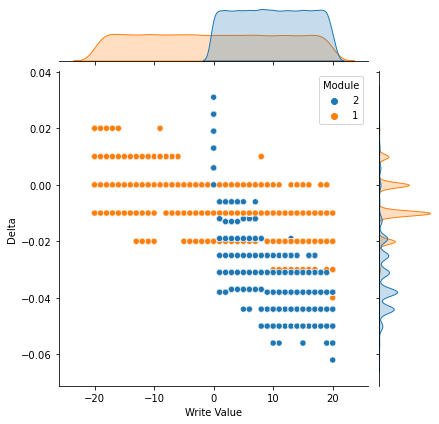

In [50]:
# AIT304
sns.jointplot(data=pdfsampleAIT304, x="Write Value", y="Delta", hue="Module")

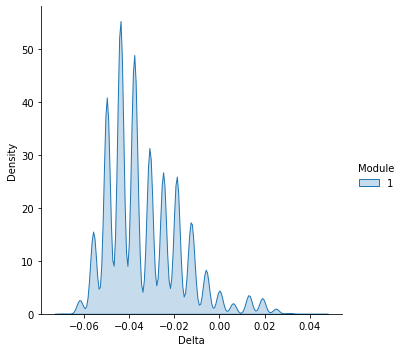

In [42]:
# SAIT302
sns.displot(pdfsampleSAIT302, x="Delta", hue="Module", kind="kde",fill=True)

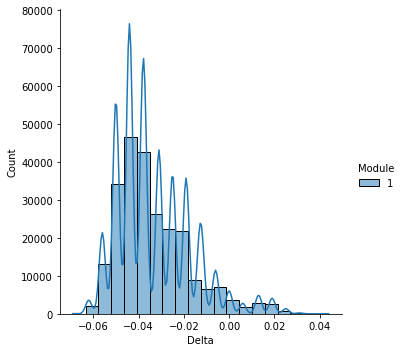

In [53]:
# SAIT302
sns.displot(pdfsampleSAIT302, x="Delta", bins=20,hue="Module", kde=True)

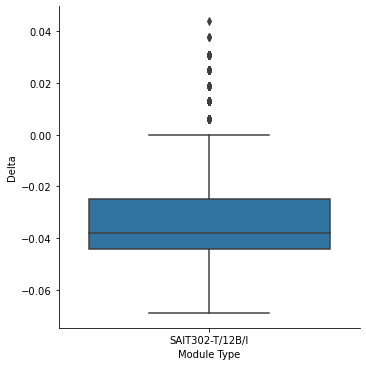

In [46]:
# SAIT302
sns.catplot(x="Module Type", y="Delta", kind="box", data=pdfsampleSAIT302)

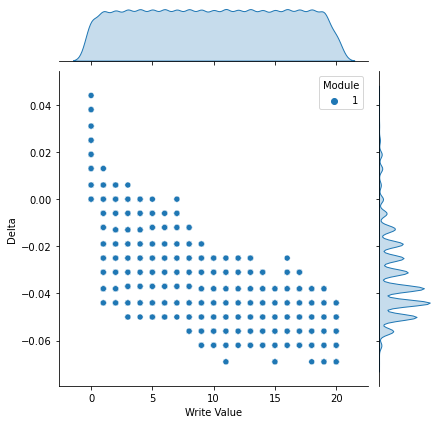

In [54]:
# SAIT302
sns.jointplot(data=pdfsampleSAIT302, x="Write Value", y="Delta", hue="Module")

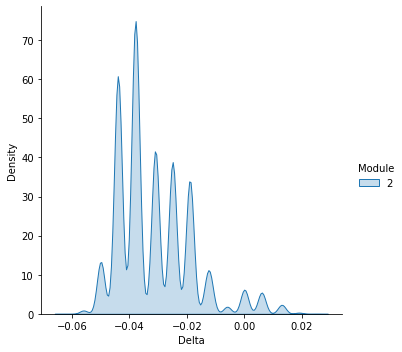

In [43]:
# SAIT304
sns.displot(pdfsampleSAIT304, x="Delta", hue="Module", kind="kde",fill=True)

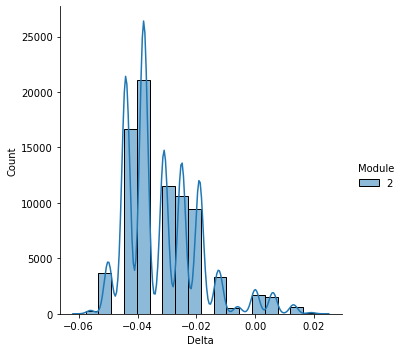

In [55]:
# SAIT304
sns.displot(pdfsampleSAIT304, x="Delta", bins=20,hue="Module", kde=True)

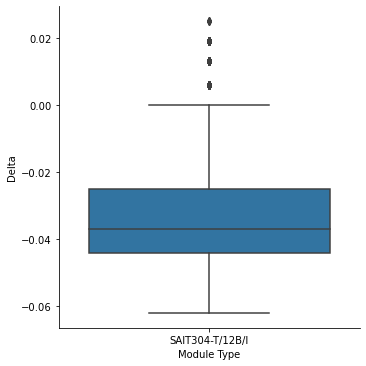

In [48]:
# SAIT304
sns.catplot(x="Module Type", y="Delta", kind="box", data=pdfsampleSAIT304)

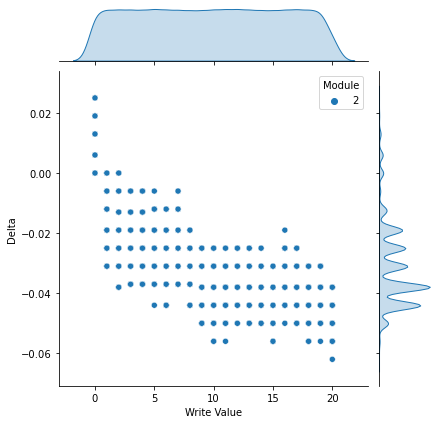

In [56]:
# SAIT304
sns.jointplot(data=pdfsampleSAIT304, x="Write Value", y="Delta", hue="Module")